## Importing Necessary Libraries

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extract Data from the Dataset
fldr="/content/drive/MyDrive/Images_1/UTKFace"

In [ ]:
import os
files=os.listdir(fldr)

## Create List of Images From the Dataset

In [ ]:

# Initialize empty lists to store age, gender, and image data
ages=[]
genders=[]
images=[]

# Iterate over each file in the 'files' list
for file in files:
  age=int(file.split('_')[0])  # Extract age and gender information from the file name
  gender=int(file.split('_')[1])
  total=fldr+'/'+file     # Construct the full path to the current file
  print(total)            # Print the full path
  image=cv2.imread(total)
 # Read and process the image
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(48,48))
  images.append(image)




Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Images_1/UTKFace/25_1_1_20170116001332046.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_0_20170117204147750.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_3_20170104234854715.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_0_20170103163718321.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_3_20170119172101233.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_3_20170104223238159.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_4_20170103225922392.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_3_20170117152030871.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_2_20170116174838291.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_0_20170117141726361.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_0_20170117142901203.jpg.chip.jpg
/content/drive/MyDrive/Images_1/UTKFace/25_1_2_20170104020610884.jpg.chip.jpg
/content/driv

## Create List of Age and Gender From the Dataset

In [ ]:
for file in files:
  age=int(file.split('_')[0])
  gender=int(file.split('_')[1])
  ages.append(age)
  genders.append(gender)

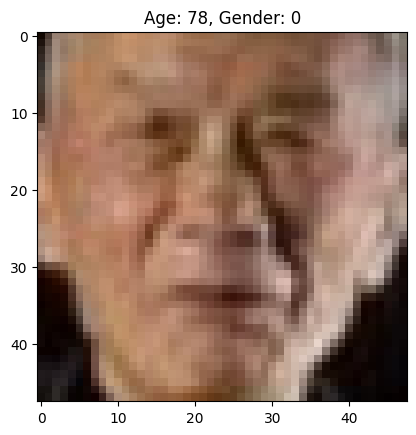

In [ ]:
plt.imshow(images[98])
plt.title(f"Age: {ages[98]}, Gender: {genders[98]}")
plt.show()

## converting the lists images, ages, and genders into NumPy arrays

In [ ]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [ ]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

## finding the number of elements in the dataset

In [ ]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


## Finding the number of sample in each Age

In [ ]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [ ]:
values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  99, 100, 101, 103, 105, 110, 111, 115, 116])

In [ ]:
val=values.tolist()
cnt=counts.tolist()

## Plotting the Number of Male and Female  samples

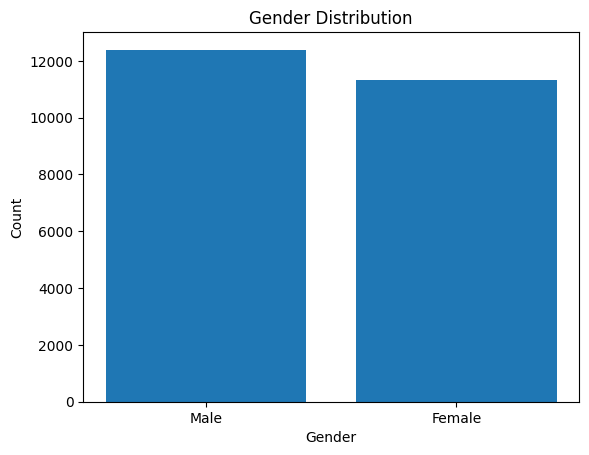

In [ ]:
gender = ['Male', 'Female']
values = [12391, 11317]

# Create a bar chart using plt.bar
plt.bar(gender, values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Display the bar chart
plt.show()


Male Distribution is high as compared to Female

## Plotting the samples Agewise

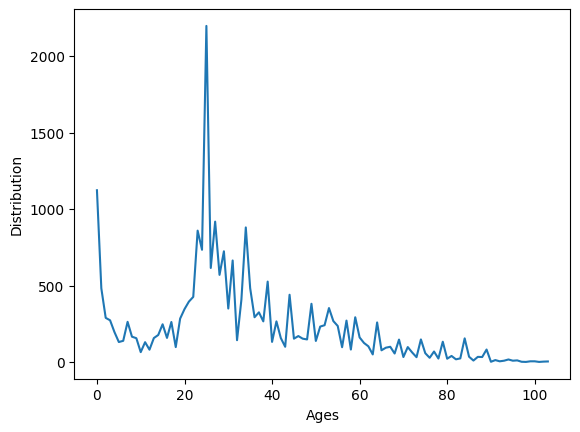

In [ ]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()



Highest count around the age of 25

In [ ]:
len(genders)

23708

## defining labels for output

In [ ]:
labels=[]  # Initialize an empty list to store pairs of age and gender
i=0
while i<len(ages):
  label=[]             # Initialize an empty list for each pair of age and gender
  label.append(ages[i])    # Append the i-th element of ages (age) to the inner list
  label.append(genders[i])   # Append the i-th element of genders (gender) to the inner list
  labels.append(label)       # Append the inner list (age and gender pair) to the outer list
  i = i + 1

## Normalization

In [ ]:
images_f_2=images_f/255

In [ ]:
images_f_2.shape

(23708, 48, 48, 3)

In [ ]:
labels_f=np.array(labels)

## splitting the dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [ ]:
y_train[0:5]

array([[32,  0],
       [75,  0],
       [45,  0],
       [ 5,  1],
       [ 1,  0]])

splitting the y_test and y_train further for better understanding

In [ ]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [ ]:
y_train_2[0][0:5]

array([0, 0, 0, 1, 0])

In [ ]:
y_train_2[1][0:5]

array([32, 75, 45,  5,  1])

## Defining the model

In [ ]:
def convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu')(input_tensor)
    x = Dropout(0.1)(x)
    return x

In [ ]:
def model(input_shape):
    # Input layer
    inputs = Input(shape=input_shape)

    # Convolutional layers
    conv_1 = convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)

    conv_2 = convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)

    conv_3 = convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)

    conv_4 = convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

    # Flatten layer
    flatten = Flatten()(maxp_4)

    # Dense layers
    dense_1 = Dense(64, activation='relu')(flatten)
    dense_2 = Dense(64, activation='relu')(flatten)

    # Dropout layers
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)

    # Output layers
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)

    # Model
    model = Model(inputs=[inputs], outputs=[output_1, output_2])

    # Compile the model
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])

    return model


In [ ]:
Model=model((48,48,3))

In [ ]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)           0         ['dropout[0][0]']             
 D)                                                                                           

In [ ]:
 from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
file_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [ ]:
History = Model.fit(x_train, y_train_2, batch_size=64, validation_data=(x_test, y_test_2), epochs=250, callbacks=callback_list)






Epoch 1/250
276/278 [============================>.] - ETA: 0s - loss: 5.3056 - sex_out_loss: 0.2086 - age_out_loss: 5.0970 - sex_out_accuracy: 0.9109 - age_out_accuracy: 0.0468
Epoch 1: val_loss did not improve from 6.89897
278/278 [==============================] - 8s 30ms/step - loss: 5.3035 - sex_out_loss: 0.2083 - age_out_loss: 5.0951 - sex_out_accuracy: 0.9113 - age_out_accuracy: 0.0467 - val_loss: 7.5644 - val_sex_out_loss: 0.2612 - val_age_out_loss: 7.3032 - val_sex_out_accuracy: 0.8863 - val_age_out_accuracy: 0.0456
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 5.2763 - sex_out_loss: 0.2097 - age_out_loss: 5.0666 - sex_out_accuracy: 0.9120 - age_out_accuracy: 0.0472
Epoch 2: val_loss did not improve from 6.89897
278/278 [==============================] - 6s 21ms/step - loss: 5.2763 - sex_out_loss: 0.2097 - age_out_loss: 5.0666 - sex_out_accuracy: 0.9120 - age_out_accuracy: 0.0472 - val_loss: 7.2681 - val_sex_out_loss: 0.2552 - val_age_out_loss: 7.0129 

In [ ]:
Model.evaluate(x_test ,y_test_2)

186/186 [==============================] - 1s 5ms/step - loss: 7.0533 - sex_out_loss: 0.3440 - age_out_loss: 6.7093 - sex_out_accuracy: 0.8935 - age_out_accuracy: 0.0456


[7.053297519683838,
 0.34399738907814026,
 6.709297180175781,
 0.8935380578041077,
 0.04555424302816391]

In [ ]:
pred=Model.predict(x_test)

186/186 [==============================] - 1s 2ms/step


## Plotting Loss

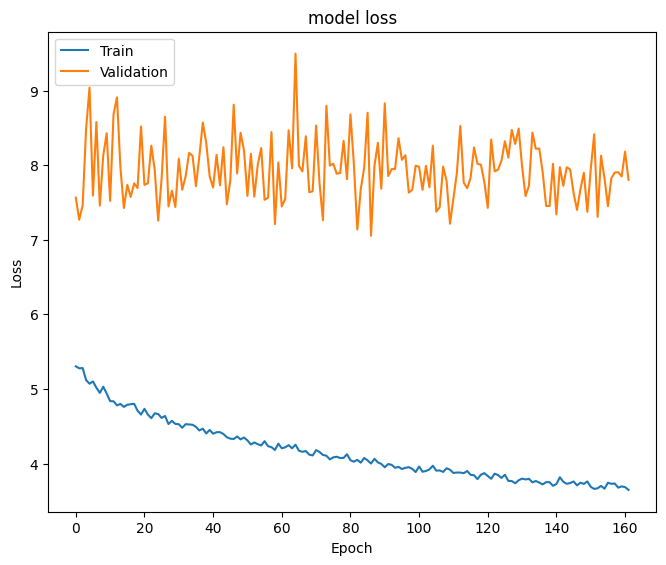

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


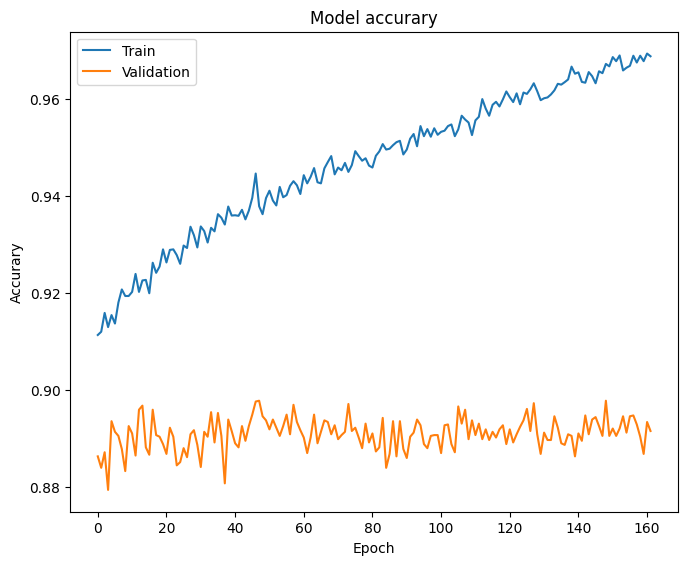

In [ ]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accurary')
plt.xlabel('Epoch')
plt.ylabel('Accurary')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

## Plotting Gender Accuracy

Text(0, 0.5, 'Predicted Age')

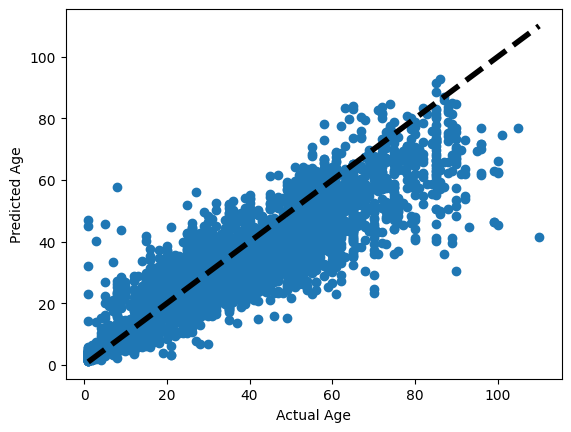

In [ ]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1], pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')


## Making Report of the model

In [ ]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i=i+1

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(y_test_2[0],Pred_l)


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3057
           1       0.89      0.89      0.89      2870

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



## Making heatmap of the model(gender only)

In [ ]:
results=confusion_matrix(y_test_2[0],Pred_l)

<Axes: >

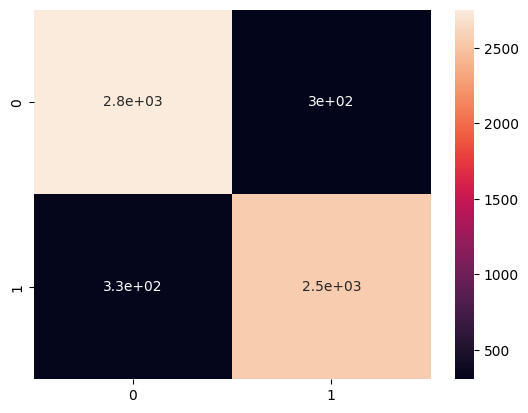

In [ ]:
sns.heatmap(results,annot=True)

## Testing the images ourself

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
  plt.imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_l=Model.predict(np.array([image_test]))
  sex_f=['Male','Female']
  age=int(np.round(pred_l[1][0]))
  sex=int(np.round(pred_l[0][0]))
  print("Predicted Age is " +str(age))
  print("Predicted Gender is " +sex_f[sex])



test-1

1/1 [==============================] - 0s 273ms/step
Predicted Age is 80
Predicted Gender is Male


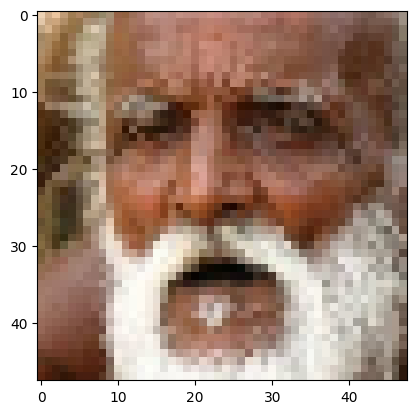

In [ ]:
test_image(4 ,images_f ,images_f_2 ,Model)

test-2

1/1 [==============================] - 0s 27ms/step
Predicted Age is 74
Predicted Gender is Male


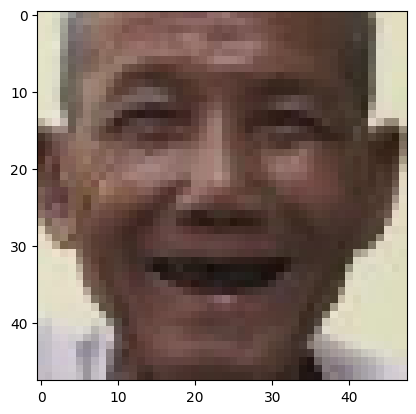

In [ ]:
test_image(24,images_f,images_f_2,Model)

test-3

1/1 [==============================] - 0s 19ms/step
Predicted Age is 8
Predicted Gender is Female


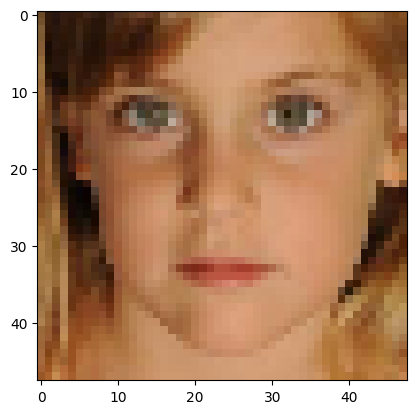

In [ ]:
test_image(189,images_f,images_f_2,Model)

test-4

1/1 [==============================] - 0s 20ms/step
Predicted Age is 36
Predicted Gender is Female


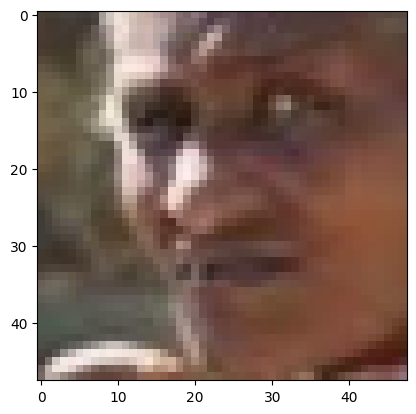

In [ ]:
test_image(999,images_f,images_f_2,Model)

test-5

1/1 [==============================] - 0s 27ms/step
Predicted Age is 75
Predicted Gender is Female


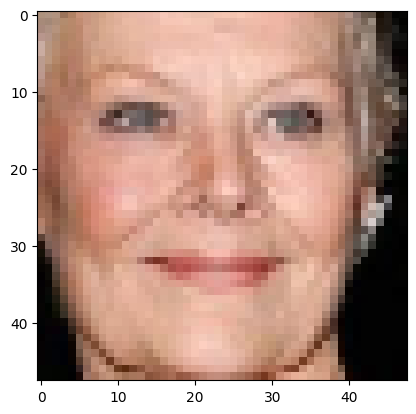

In [ ]:
test_image(9,images_f,images_f_2,Model)

test-6

1/1 [==============================] - 0s 26ms/step
Predicted Age is 49
Predicted Gender is Male


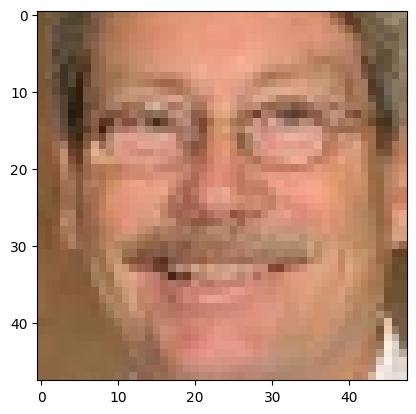

In [ ]:
test_image(4999,images_f,images_f_2,Model)